In [2]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np


# Gathering Data

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

### Twitter access code

In [121]:
###########################################################################################################
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
###########################################################################################################

In [129]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'pred'
response = requests.get(url)

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [4]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
df3 = pd.read_json('tweet-json.txt',lines=True)

# Assessing

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
df1['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Bailey         7
an             7
Buddy          7
Daisy          7
Jax            6
Scout          6
Bella          6
Dave           6
Stanley        6
Oscar          6
Rusty          6
Milo           6
Jack           6
Koda           6
Leo            6
Sunny          5
            ... 
Darla          1
Trevith        1
Mason          1
Birf           1
Rascal         1
Katie          1
Dylan          1
Ferg           1
Eevee          1
Zooey          1
Beemo          1
Scruffers      1
Clifford       1
Spencer        1
Molly          1
Teddy          1
Cheryl         1
Ralphé         1
Barry          1
Asher          1
Daniel         1
Chloe          1
Ronnie         1
Cedrick        1
Moofasa        1
Chaz           1
Brownie        1
Rumble        

In [12]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Cleaning

First of all we're creating a copy of our dataset for good practice.

In [18]:
df1mod = df1.copy()

## Quality issue #1

### Define

We're going to use df1 as our master dataset, this will be our starting point in order to build the final dataset.

First problem detected is presence of retweets y our data, so we're dumping those rows.

### Code

In [19]:
df1mod = df1mod[pd.isnull(df1['retweeted_status_id'])]

### Test

In [20]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

## Quality issue #2

### Define

Unused columns are present in our dataset, we proceed to delete them.

### Code

In [21]:
df1mod = df1mod.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id','in_reply_to_status_id','expanded_urls'])

### Test

In [22]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


## Quality issue #3

### Define

Rating numerators have value outside of allowed range according to @WeRateDogs, so a filter is applied.

### Code

In [23]:
df1mod = df1mod.query('rating_numerator >= 0 & rating_numerator <= 20')

### Test

In [24]:
df1mod['rating_numerator'].value_counts()

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
0       2
17      1
15      1
20      1
Name: rating_numerator, dtype: int64

## Quality issue #4

### Define

Rating denominators have value outside of allowed range according to @WeRateDogs, so a filter is applied.

### Code

In [25]:
df1mod = df1mod.query('rating_denominator == 10')

### Test

In [26]:
df1mod['rating_denominator'].value_counts()

10    2145
Name: rating_denominator, dtype: int64

## Quality issue #5

### Define

Lots of 'None' values in 'name' column. We decide to delete those rows.

### Code

In [27]:
df1mod = df1mod[df1mod['name'] != 'None']

### Test

In [28]:
df1mod['name'].value_counts()

a            54
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
the           8
Sadie         8
Lola          8
Toby          7
Daisy         7
Bella         6
Bailey        6
Jax           6
Stanley       6
Koda          6
Oscar         6
Bo            6
Dave          5
Milo          5
Leo           5
Buddy         5
an            5
Scout         5
Louis         5
Rusty         5
Chester       5
Bentley       5
             ..
Livvie        1
Kendall       1
Donny         1
Gerbald       1
Cedrick       1
Ronnie        1
Moreton       1
Chloe         1
Shiloh        1
Jebberson     1
Shikha        1
Mollie        1
Strudel       1
Mutt          1
Ralpher       1
Happy         1
Bradley       1
Jarod         1
Zooey         1
Beemo         1
Scruffers     1
Clifford      1
mad           1
Spencer       1
Cheryl        1
Ralphé        1
Eevee         1
Rumpole       1
Daniel        1
Snickers      1
Name: name, Length: 951,

## Quality issue #6

### Define

'Timestamp' column is an object, we're converting this column to datetime[ns].

### Code

In [29]:
df1mod['timestamp'] =  pd.to_datetime(df1mod['timestamp'])

### Test

In [30]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 2354
Data columns (total 11 columns):
tweet_id              1486 non-null int64
timestamp             1486 non-null datetime64[ns]
source                1486 non-null object
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null object
floofer               1486 non-null object
pupper                1486 non-null object
puppo                 1486 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 139.3+ KB


## Quality issue #7

### Define

After doing some modifications, index is inconsistent. Index reset is applied.

### Code

In [31]:
df1mod = df1mod.reset_index(drop=True)

### Test

In [32]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 11 columns):
tweet_id              1486 non-null int64
timestamp             1486 non-null datetime64[ns]
source                1486 non-null object
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null object
floofer               1486 non-null object
pupper                1486 non-null object
puppo                 1486 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 127.8+ KB


## Quality issue #8

### Define

"Source" column seems useless, since every post is uploaded from the same device, so we´re dropping this column.

### Code

In [33]:
df1mod = df1mod.drop(columns=['source'])

### Test

In [34]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 10 columns):
tweet_id              1486 non-null int64
timestamp             1486 non-null datetime64[ns]
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null object
floofer               1486 non-null object
pupper                1486 non-null object
puppo                 1486 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 116.2+ KB


# Tidiness

## Tidiness issue #1

### Define

Dog stages are located in different columns, we're going to merge all information into one.

### Code

In [35]:
df1mod['doggo'].replace(['None'], np.nan, regex=True,inplace=True)
df1mod['floofer'].replace(['None'], np.nan, regex=True,inplace=True)
df1mod['pupper'].replace(['None'], np.nan, regex=True,inplace=True)
df1mod['puppo'].replace(['None'], np.nan, regex=True,inplace=True)

In [36]:
df1mod = df1mod.fillna('')

In [37]:
df1mod['DogStages'] = df1mod['doggo'] + df1mod['floofer'] + df1mod['pupper'] + df1mod['puppo']

In [38]:
df1mod['DogStages'].replace([''],np.nan,inplace=True)

In [64]:
df1mod = df1mod.drop(columns=['pupper','doggo','puppo','floofer'])

In [40]:
df1mod = df1mod.query('DogStages != "doggopupper"')

In [ ]:
df1mod = df1mod.reset_index(drop=True)

In [ ]:
df1mod = df1mod.fillna('None')

### Test

In [69]:
df1mod['DogStages'].value_counts()

None       1289
pupper      131
doggo        40
puppo        16
floofer       5
Name: DogStages, dtype: int64

In [70]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
tweet_id              1481 non-null int64
timestamp             1481 non-null datetime64[ns]
text                  1481 non-null object
rating_numerator      1481 non-null int64
rating_denominator    1481 non-null int64
name                  1481 non-null object
DogStages             1481 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 81.1+ KB


## Tidines issue #2

First of all we're creating a copy of our datasets for good practice.

In [49]:
df3mod = df3.copy()

In [50]:
df2mod = df2.copy()

### Define

Since our master dataset must include favorite count, retweet count and image prediction data, we're merging all of this information based on rows already aviable in our master dataset.

### Code

In [51]:
df3mod = df3mod.filter(['favorite_count','retweet_count','full_text'])

In [52]:
df3mod = df3mod.rename(columns={"full_text": "text"})

In [53]:
dftemp = pd.merge(df1mod, df3mod, on='text')

In [54]:
dffinal = pd.merge(dftemp, df2mod, on='tweet_id')

### Test

In [55]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 24 columns):
tweet_id              1434 non-null int64
timestamp             1434 non-null datetime64[ns]
text                  1434 non-null object
rating_numerator      1434 non-null int64
rating_denominator    1434 non-null int64
name                  1434 non-null object
doggo                 1434 non-null object
floofer               1434 non-null object
pupper                1434 non-null object
puppo                 1434 non-null object
DogStages             183 non-null object
favorite_count        1434 non-null int64
retweet_count         1434 non-null int64
jpg_url               1434 non-null object
img_num               1434 non-null int64
p1                    1434 non-null object
p1_conf               1434 non-null float64
p1_dog                1434 non-null bool
p2                    1434 non-null object
p2_conf               1434 non-null float64
p2_dog                1434 non-n

# Insights

### Explanation of this part uploaded in 'act_report.pdf'

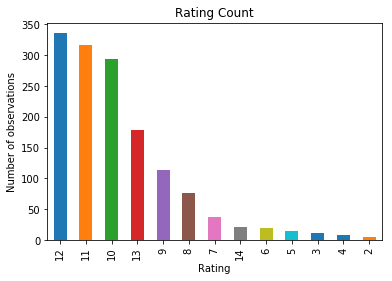

In [56]:
ax = dffinal['rating_numerator'].value_counts().plot(kind='bar',title='Rating Count')
ax.set_ylabel('Number of observations')
ax.set_xlabel('Rating')
plt.show();

In [57]:
prediction = dffinal.query('p1_conf >= 0.8 & p1_dog == True')

In [58]:
prediction['p1'].value_counts()

golden_retriever                  42
Pembroke                          30
pug                               24
Labrador_retriever                22
Pomeranian                        17
Samoyed                           17
Chihuahua                         14
chow                              14
French_bulldog                    13
German_shepherd                    8
Chesapeake_Bay_retriever           7
toy_poodle                         7
malamute                           5
miniature_pinscher                 5
Blenheim_spaniel                   5
Shetland_sheepdog                  5
Brittany_spaniel                   5
Shih-Tzu                           5
basset                             5
vizsla                             5
Pekinese                           4
American_Staffordshire_terrier     4
Bernese_mountain_dog               4
cocker_spaniel                     3
Old_English_sheepdog               3
Cardigan                           3
Doberman                           3
b

In [59]:
dffinal['name'].value_counts()

a             54
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
the            7
Lola           7
Bella          6
Bo             6
Stanley        6
Jax            6
Koda           6
an             5
Dave           5
Milo           5
Louis          5
Buddy          5
Oscar          5
Chester        5
Bailey         5
Rusty          5
Scout          5
Leo            5
Scooter        4
              ..
Livvie         1
Kendall        1
Donny          1
Gerbald        1
Kara           1
Ronnie         1
Moreton        1
Chloe          1
Happy          1
incredibly     1
Amélie         1
Shiloh         1
Jebberson      1
Shikha         1
Mollie         1
Strudel        1
Mutt           1
Ralpher        1
Bradley        1
Daniel         1
Jarod          1
Zooey          1
Scruffers      1
Clifford       1
Astrid         1
Spencer        1
Cheryl         1
Ralphé        

In [74]:
dffinal['p1'].value_counts()[0:10]

golden_retriever      93
Pembroke              68
Labrador_retriever    67
Chihuahua             61
pug                   42
chow                  34
toy_poodle            32
Pomeranian            27
Samoyed               25
malamute              23
Name: p1, dtype: int64

In [76]:
dffinal['name'].value_counts()[0:11]

a          54
Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Daisy       7
Name: name, dtype: int64

In [77]:
dffinal.to_csv('twitter_archive_master.csv', index=False)

In [78]:
from sqlalchemy import create_engine

In [79]:
engine = create_engine('sqlite:///twitter_archive_master.db')
dffinal.to_sql('master', engine, index=False)